<a href="https://colab.research.google.com/github/ozgunbilecen/IE423/blob/main/OzgunBilecen_Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

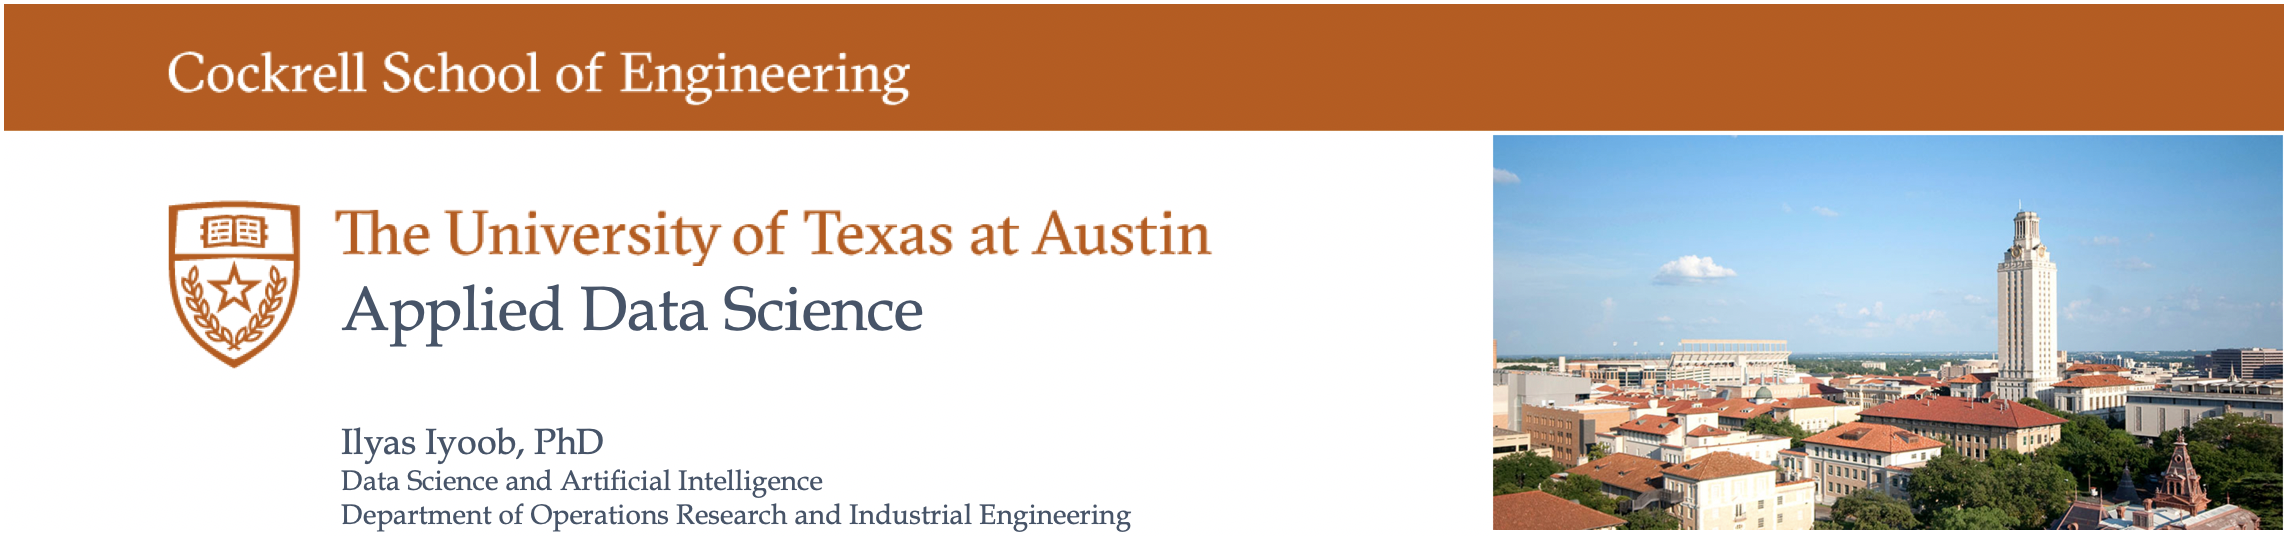

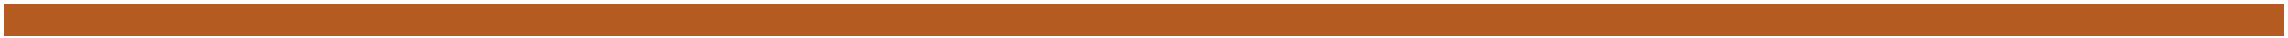

## <font color='#475468'> Banking:</font>
### <font color='#475468'> Can you predict the subscription to term deposit?</font>

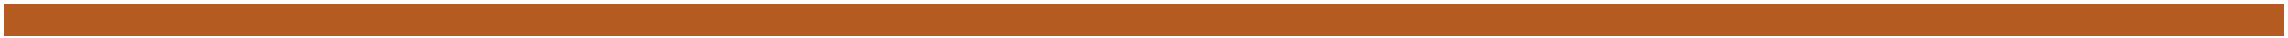

## Initialize

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dfB = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IE-423/archive (3)/bank-full.csv')

In [4]:
dfB.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Analyze Data

In [5]:
dfB.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
cols_cat= dfB.select_dtypes(include= object).columns
cols_cat

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [8]:
cols_num= dfB.select_dtypes(include= np.number).columns
cols_num

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

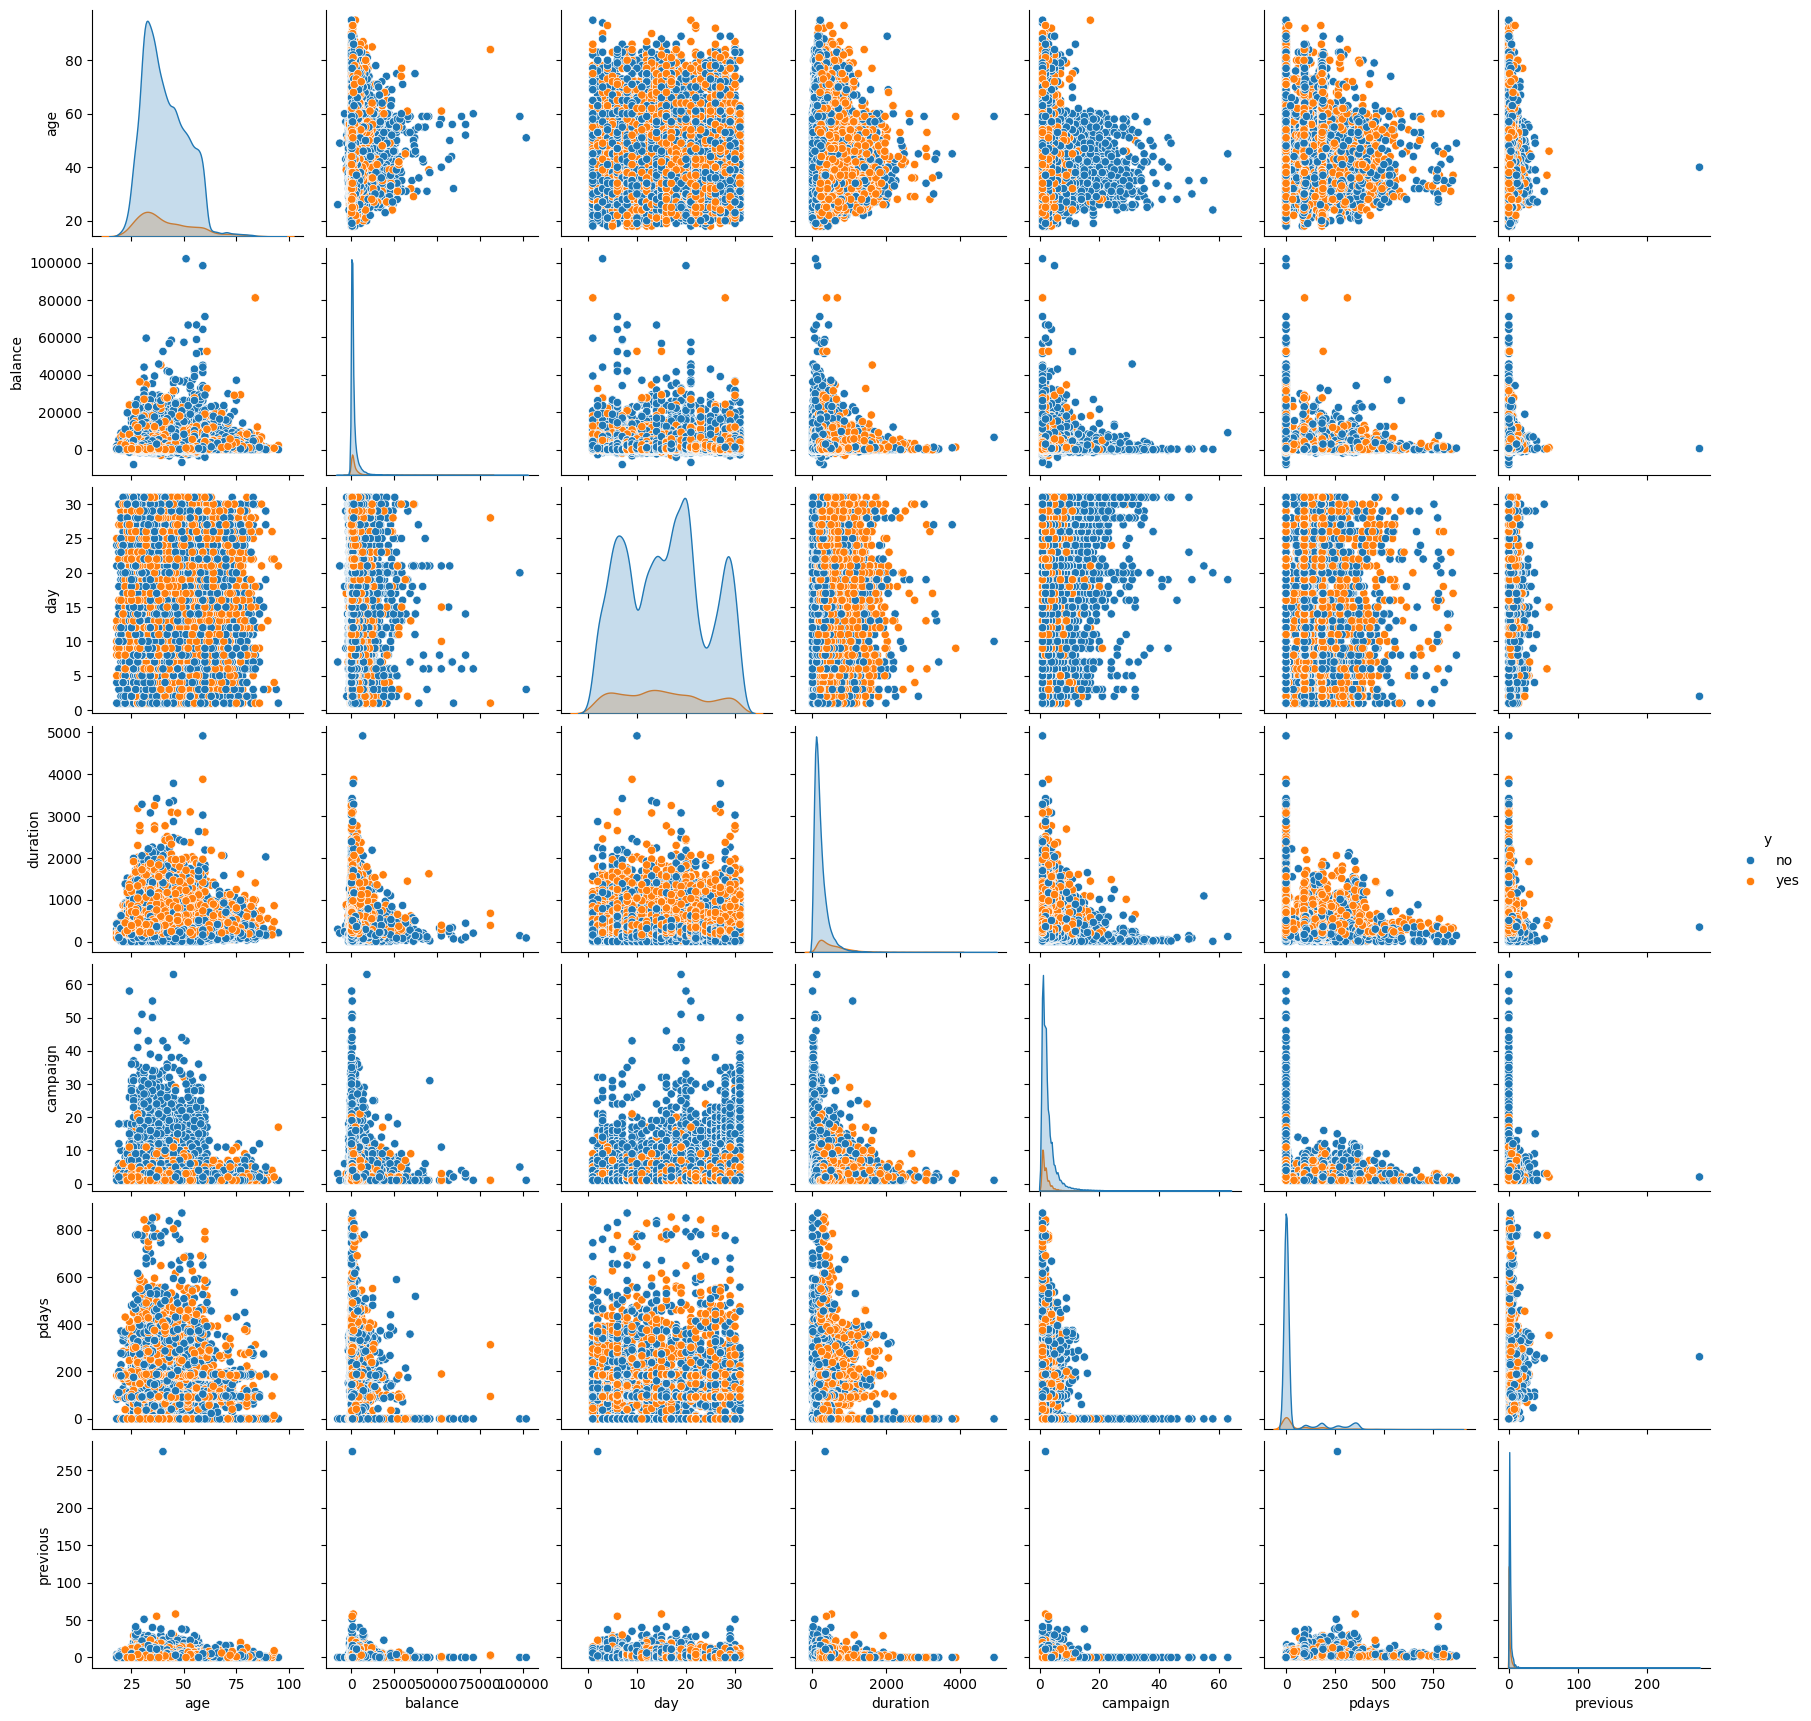

In [9]:
# Plot pair-wise relationships in the dataset
import seaborn as sns
sns.pairplot(dfB, hue='y')

In [10]:
dfB.corr(numeric_only=True)

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


There doesn't seem to be any significant correlations going on.  Let's dig deeper into the balance by age plot...

<Axes: xlabel='age', ylabel='balance'>

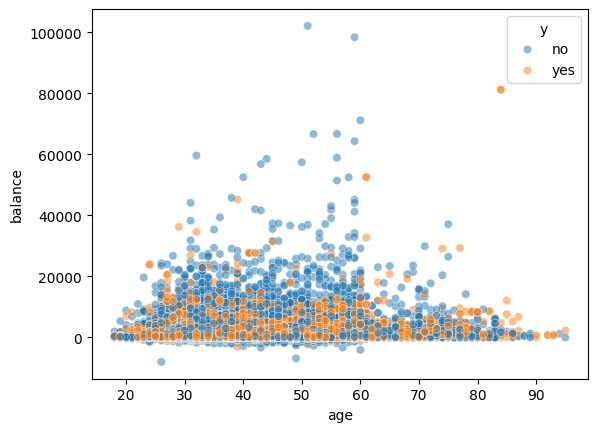

In [11]:
# 3D Scatter plot with hue
sns.scatterplot(x=dfB['age'], y=dfB['balance'], hue=dfB['y'], alpha = 0.5)

Seems like answer 'yes' is clustered below.

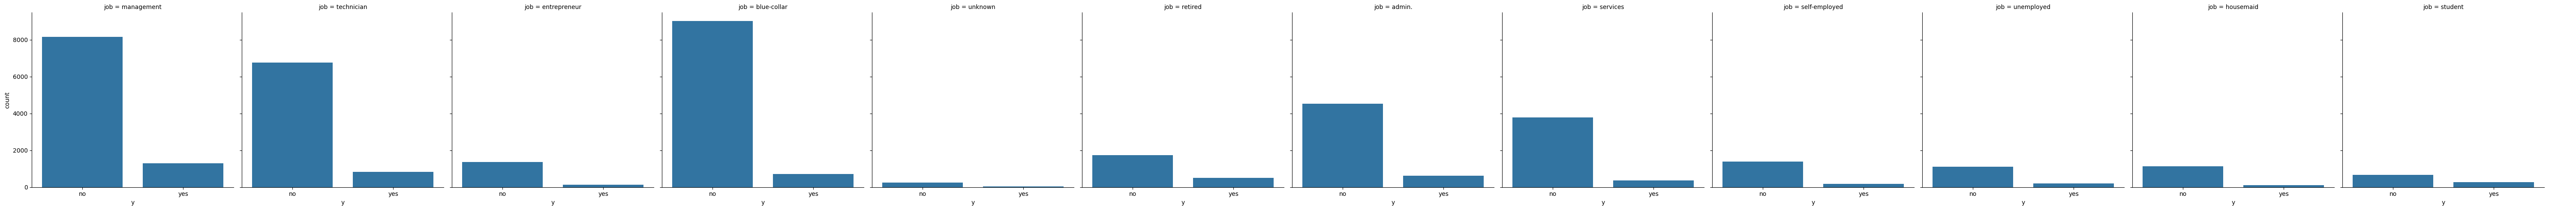

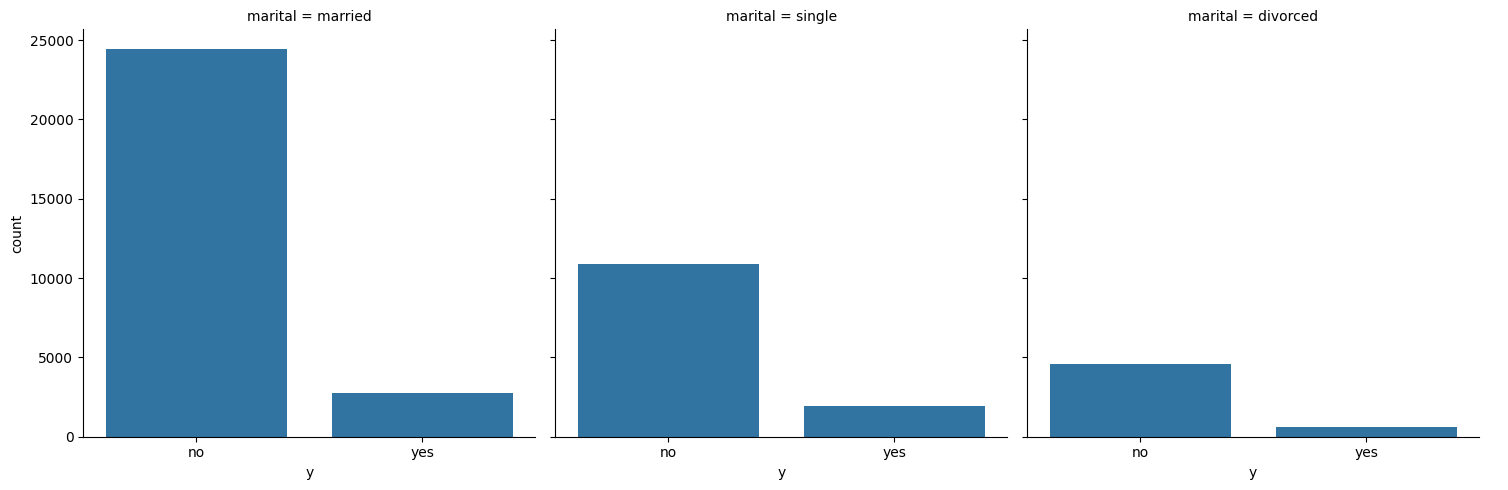

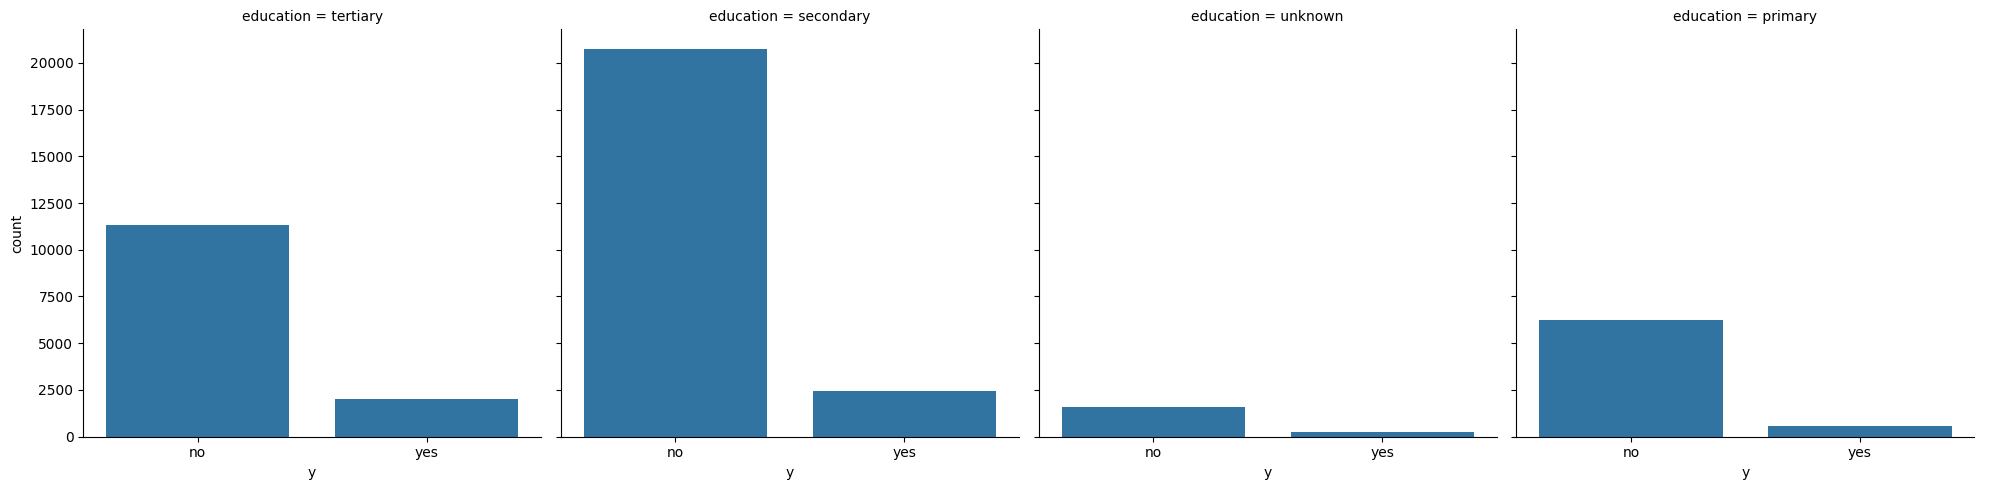

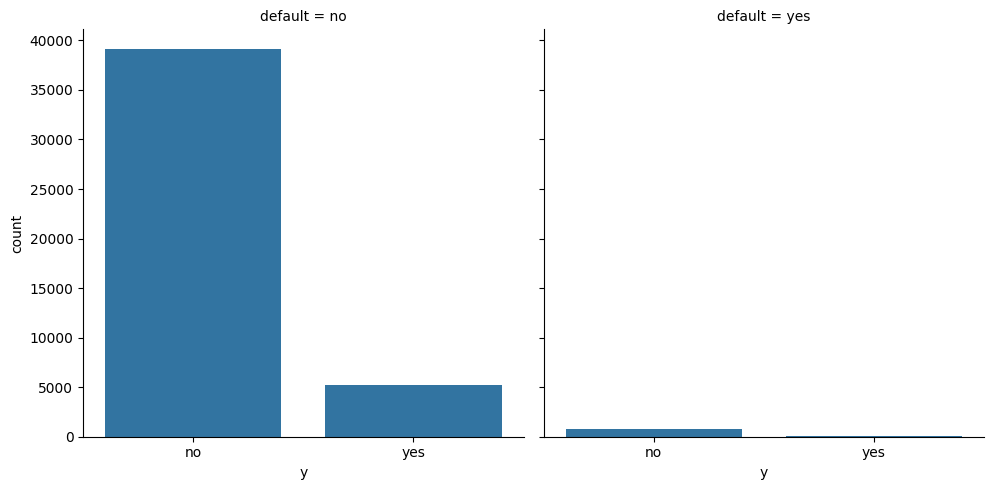

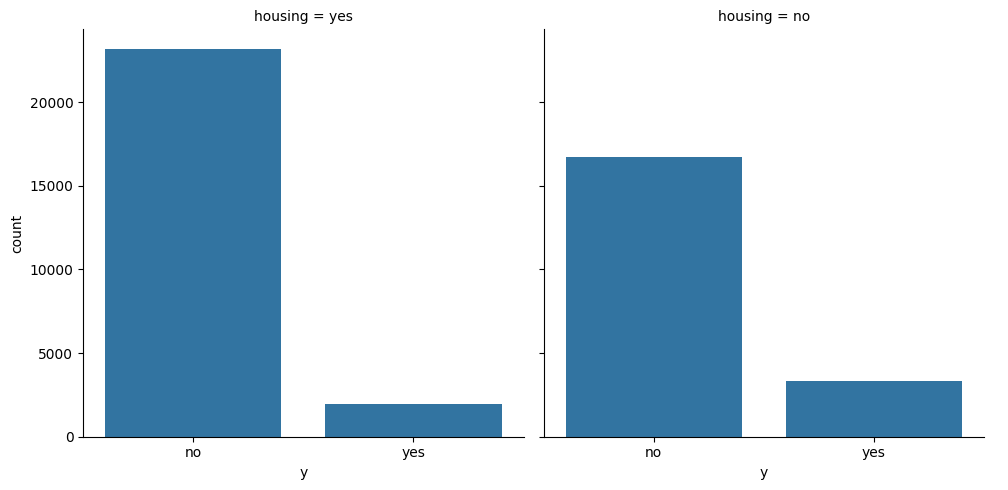

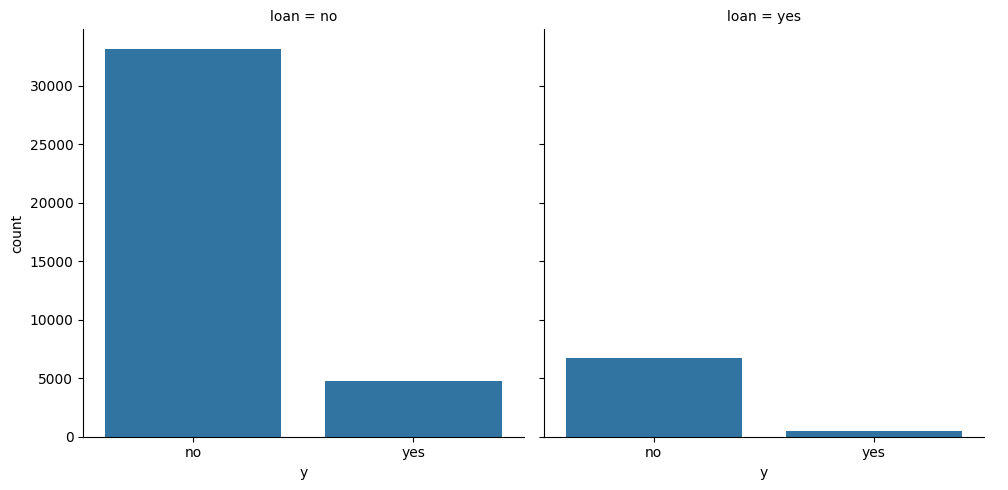

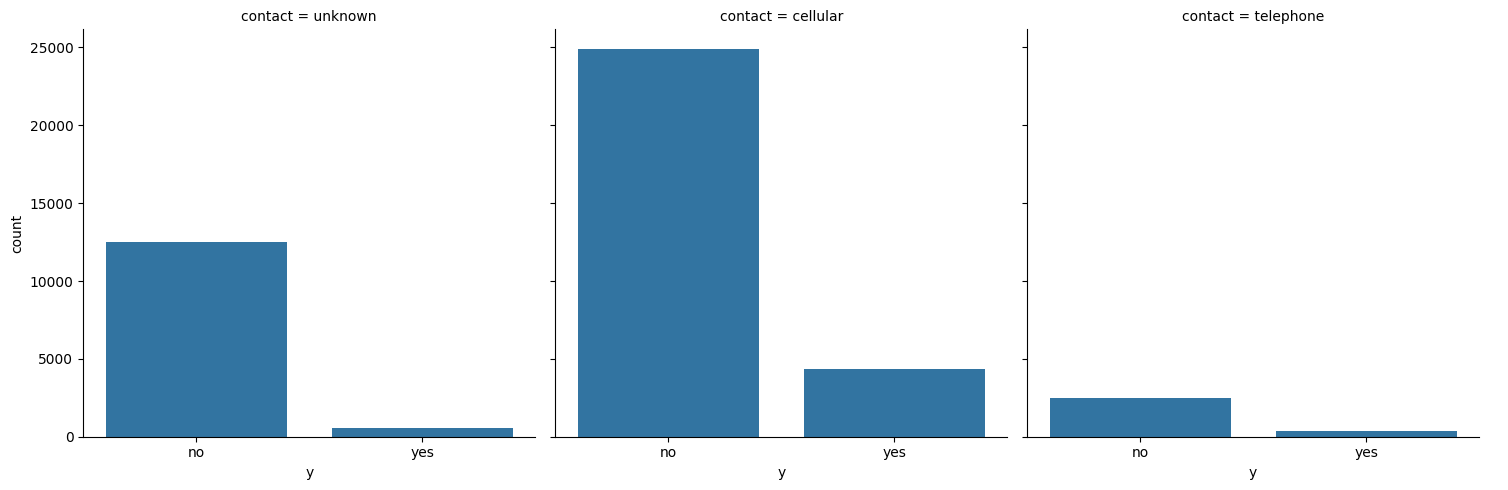

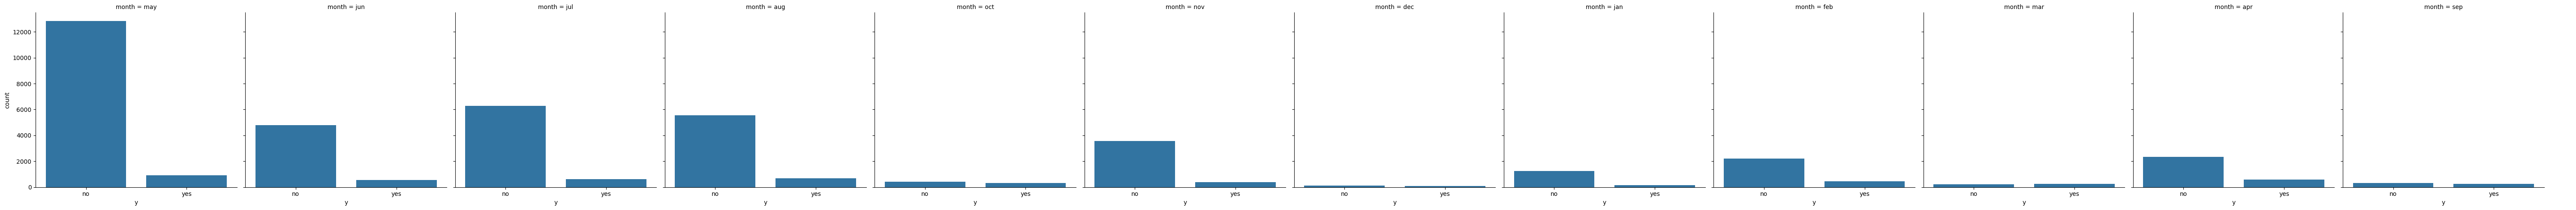

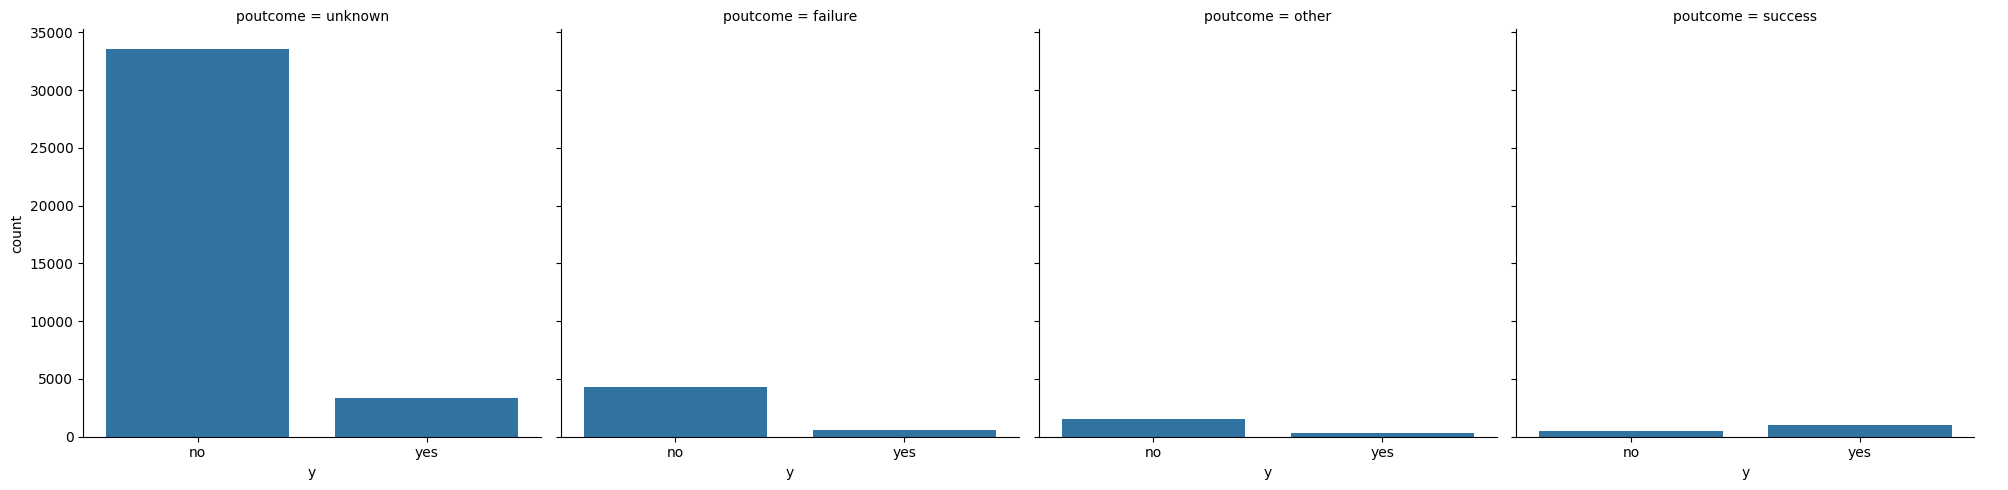

In [12]:
for col in cols_cat.drop(['y']):
    sns.catplot(x='y', col=col, kind='count', data= dfB)
plt.show()

Label Encoding categorical data

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in cols_cat:
    dfB[col] = label_encoder.fit_transform(dfB[col])

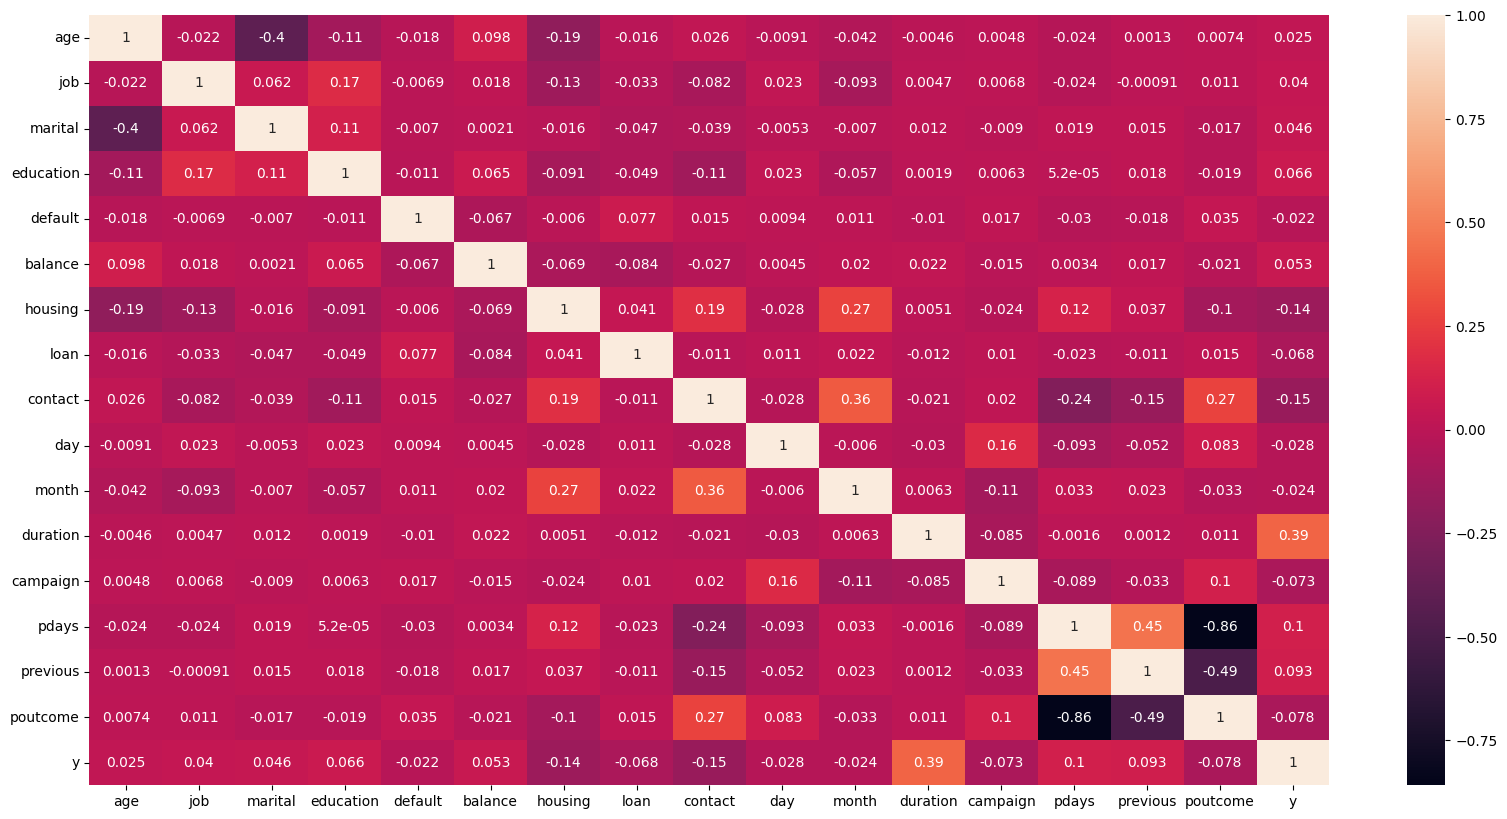

In [14]:
r = dfB.corr(numeric_only=False)
fig = plt.figure(figsize=(20,10))
sns.heatmap(r, annot=True)
plt.show()

Since pdays and poutcome are highly correlated pdays are dropped

In [15]:
df = dfB.drop(['pdays'], axis=1)

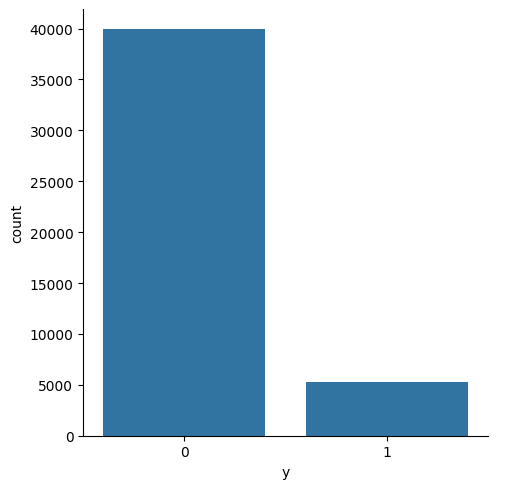

In [16]:
sns.catplot(x='y', kind='count', data= dfB)

Target is not balanced.

## Predict Target

We will not be able to use Linear Regression because our target is binary and not continuous.  So, let's transform the linear model into something that would split the output into two 'classes'...

Such problems are known as **Classification Models**, and let's try a few different models...

### Logistic Regression

In logistic regression, we take the output of the linear function and squash the value within the range of [0,1] using the sigmoid function( logistic function). The Sigmoid-Function is an S-shaped curve that can take any real-valued number and map it into a value between the range of 0 and 1, but never exactly at those limits. Typically, if the squashed value is greater than a threshold value we assign it a label 1, else we assign it a label 0.

Scaling, Splitting and Oversampling the minority class in training dataset

In [18]:
from sklearn.preprocessing import scale
y = df['y']
X = scale(df.drop(['y'], axis=1))

X_tr, X_test, y_tr, y_test = train_test_split(X, y,train_size=0.8, test_size=0.2,random_state=1)

In [19]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=1)
X_train, y_train = smote.fit_resample(X_tr, y_tr)

In [20]:
# Build Logistic Regression model
from sklearn.linear_model import LogisticRegression


mdlLgrHrt = LogisticRegression(random_state=1)
mdlLgrHrt.fit(X_train, y_train)
y_test_pred = mdlLgrHrt.predict(X_test)

Since target is binary and not continuous, we cannot directly compare the prediction with the actual.  So, let's view the model result in a table - also known as a **Confusion Matrix**.

In [21]:
# Display model results using
from sklearn.metrics import confusion_matrix

print ('Confusion Matrix:')
print (confusion_matrix(y_test, y_test_pred))

Confusion Matrix:
[[6419 1574]
 [ 227  823]]


## Metric 1: F1-score
The F1-score is simply the harmonic mean of the precision and recall

In [22]:
# Display performance results
from sklearn.metrics import classification_report

print ('Classification Report (Logistic Regression):')
print (classification_report(y_test, y_test_pred))

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.97      0.80      0.88      7993
           1       0.34      0.78      0.48      1050

    accuracy                           0.80      9043
   macro avg       0.65      0.79      0.68      9043
weighted avg       0.89      0.80      0.83      9043



## Metric 2: ROC AUC Score

To summarize all the performance results into a single number, let's plot the
True Positive Rate (TPR) = TP / (TP + FN) = 25/31
against
False Positive Rate (FPR) = FP / (FP + TN) = 10/30

An **ROC (Receiver Operating Characteristic) curve** plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

In [23]:
# Display summary results
from sklearn.metrics import roc_auc_score

print ('AUC Score (Logistic Regression):')
print (roc_auc_score(y_test, y_test_pred))

AUC Score (Logistic Regression):
0.7934436083954413


Now that we have one working model with acceptable results, let's see if we can improve it by trying out some other models...

utexas_ds_orie_divider_gray.png

### Naive Bayes
This is a different way of getting to a similar outcome. Naive Bayes is a probabilistic model that uses Bayes Theorem to predict probability of target value given features based on the probability of features given the target. Since our features seems to be independent to some extend, Naive Bayes is expected to work better.

In [24]:
# Build Naive Bayes - Gaussian model
from sklearn.naive_bayes import GaussianNB

mdlNbgHrt = GaussianNB()
mdlNbgHrt.fit(X_train,y_train)
y_test_pred = mdlNbgHrt.predict(X_test)

print ('Results (Naive Bayes - Gaussian):\n')

print ('Classification Report:')
print (classification_report(y_test, y_test_pred))

print ('AUC Score:')
print (roc_auc_score(y_test, y_test_pred))

Results (Naive Bayes - Gaussian):

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.59      0.73      7993
           1       0.22      0.88      0.35      1050

    accuracy                           0.62      9043
   macro avg       0.60      0.74      0.54      9043
weighted avg       0.89      0.62      0.69      9043

AUC Score:
0.7353975204494408


### K-Nearest Neighbor (KNN)
This is yet another way of getting to a similar outcome, but this time using cartesian distances to determine how close or far a new data point is to the previous data points.

In [25]:
# Build KNN model with 5 nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

mdlKnnHrt = KNeighborsClassifier(n_neighbors=10)
mdlKnnHrt.fit(X_train, y_train)
y_test_pred = mdlKnnHrt.predict(X_test)

print ('AUC Score (K-Nearest Neighbor):')
print (roc_auc_score(y_test, y_test_pred))

AUC Score (K-Nearest Neighbor):
0.7797461469261795


Let's try a different type of classification model before we wrap up...

### Support Vector Machines
While Logistic Regression and Naive Bayes are probabilistic models, Support Vector Machines try to create a boundary that maximize the margin between the different classes.

In [26]:
# Build Support Vector Machines - Classifier model

from sklearn.svm import SVC

mdlSvmHrt = SVC()
mdlSvmHrt.fit(X_train, y_train)
y_test_pred = mdlSvmHrt.predict(X_test)

print ('Results (Support Vector Classifier):\n')

print ('Classification Report:')
print (classification_report(y_test, y_test_pred))

print ('AUC Score:')
print (roc_auc_score(y_test, y_test_pred))

Results (Support Vector Classifier):

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      7993
           1       0.38      0.83      0.52      1050

    accuracy                           0.82      9043
   macro avg       0.67      0.82      0.70      9043
weighted avg       0.90      0.82      0.85      9043

AUC Score:
0.8246971457167879


Based on all the above models, it seems like Support Vector gives us the best results with an AUC score of 82% which in smote oversampling of the minority class.

utexas_ds_orie_divider_gray.png

What if we undersampled majority class?

In [27]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y,train_size=0.8, test_size=0.2,random_state=1)

In [28]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_usampled, y_usampled = rus.fit_resample(X_train1, y_train1)

In [29]:
# Build Logistic Regression model
from sklearn.linear_model import LogisticRegression


mdlLgrHrt = LogisticRegression(random_state=1)
mdlLgrHrt.fit(X_usampled, y_usampled)
y_test_pred1 = mdlLgrHrt.predict(X_test1)

In [30]:
# Display model results using
from sklearn.metrics import confusion_matrix

print ('Confusion Matrix:')
print (confusion_matrix(y_test1, y_test_pred1))

Confusion Matrix:
[[6406 1587]
 [ 215  835]]


In [31]:
# Display performance results
from sklearn.metrics import classification_report

print ('Classification Report (Logistic Regression):')
print (classification_report(y_test1, y_test_pred1))

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.97      0.80      0.88      7993
           1       0.34      0.80      0.48      1050

    accuracy                           0.80      9043
   macro avg       0.66      0.80      0.68      9043
weighted avg       0.90      0.80      0.83      9043



In [32]:
# Display summary results
from sklearn.metrics import roc_auc_score

print ('AUC Score (Logistic Regression):')
print (roc_auc_score(y_test1, y_test_pred1))

AUC Score (Logistic Regression):
0.7983446825496118


utexas_ds_orie_divider_gray.png

In [33]:
# Build Naive Bayes - Gaussian model
from sklearn.naive_bayes import GaussianNB

mdlNbgHrt = GaussianNB()
mdlNbgHrt.fit(X_train,y_train)
y_test_pred1 = mdlNbgHrt.predict(X_test1)

print ('Results (Naive Bayes - Gaussian):\n')

print ('Classification Report:')
print (classification_report(y_test1, y_test_pred1))

print ('AUC Score:')
print (roc_auc_score(y_test1, y_test_pred1))

Results (Naive Bayes - Gaussian):

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.59      0.73      7993
           1       0.22      0.88      0.35      1050

    accuracy                           0.62      9043
   macro avg       0.60      0.74      0.54      9043
weighted avg       0.89      0.62      0.69      9043

AUC Score:
0.7353975204494408


In [34]:
# Build KNN model with 5 nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

mdlKnnHrt = KNeighborsClassifier(n_neighbors=10)
mdlKnnHrt.fit(X_usampled, y_usampled)
y_test_pred1 = mdlKnnHrt.predict(X_test1)

print ('AUC Score (K-Nearest Neighbor):')
print (roc_auc_score(y_test1, y_test_pred1))

AUC Score (K-Nearest Neighbor):
0.7853173908121989


In [35]:
# Build Support Vector Machines - Classifier model

from sklearn.svm import SVC

mdlSvmHrt = SVC()
mdlSvmHrt.fit(X_usampled, y_usampled)
y_test_pred1 = mdlSvmHrt.predict(X_test1)

print ('Results (Support Vector Classifier):\n')

print ('Classification Report:')
print (classification_report(y_test1, y_test_pred1))

print ('AUC Score:')
print (roc_auc_score(y_test1, y_test_pred1))

Results (Support Vector Classifier):

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.79      0.87      7993
           1       0.34      0.85      0.49      1050

    accuracy                           0.79      9043
   macro avg       0.66      0.82      0.68      9043
weighted avg       0.90      0.79      0.83      9043

AUC Score:
0.8194963450161747


Based on all the above models, it seems like Support Vector gives us the best results with an AUC score of 82% which in random undersampling of majority class in training data.

utexas_ds_orie_divider_gray.png